<a href="https://colab.research.google.com/github/ViAnisimova/protocol/blob/master/%D0%A0%D0%B5%D0%BF%D1%80%D0%BE%D0%B4_%D0%BF%D0%BB%D0%B0%D0%BD_%D0%A5%D0%BE%D0%BB%D0%BB%D0%B0%D0%BD%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: in the future out of bounds indices will ra

-5.416637937209121


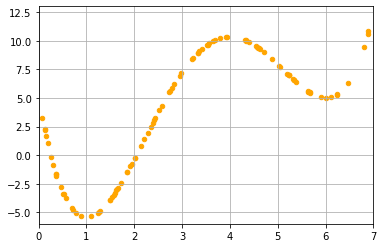

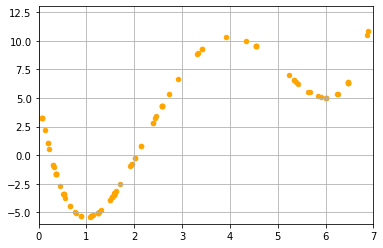

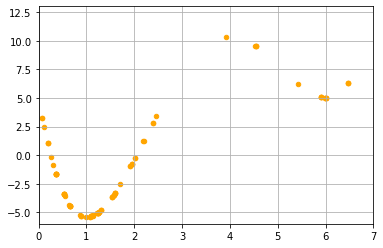

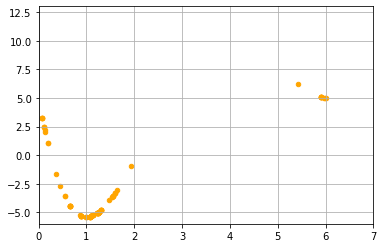

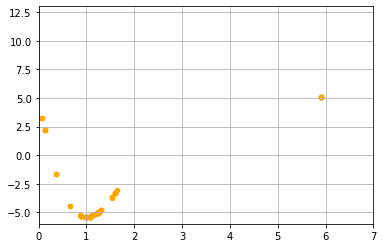

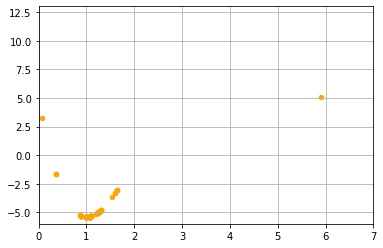

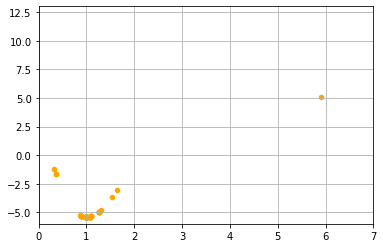

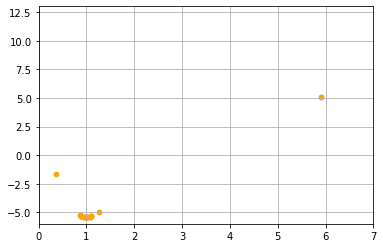

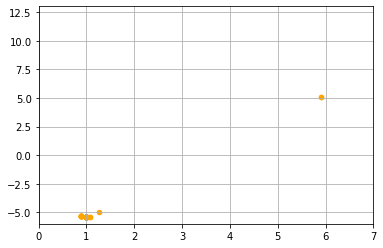

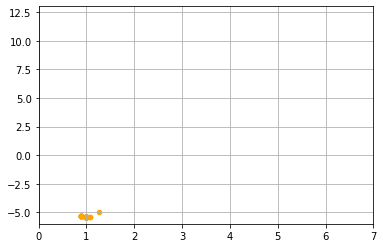

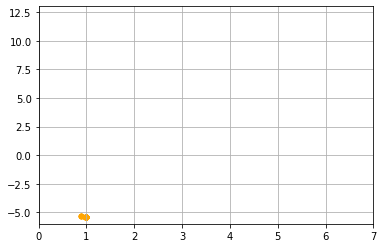

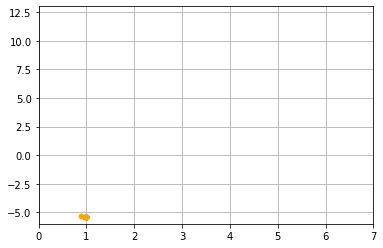

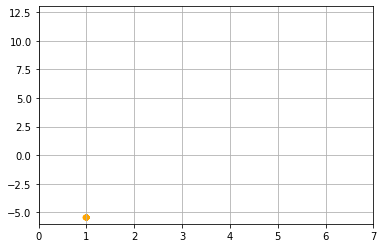

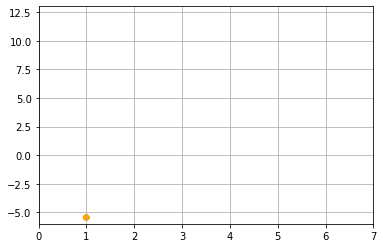

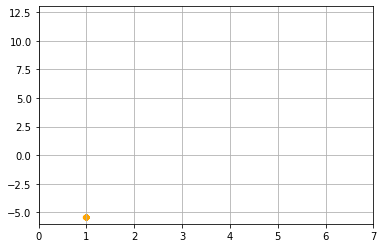

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


xl=0
xh=7
m=32
N=100
x=np.random.randint(0,2,size=(100,m))   
X = np.zeros(shape=(0,32))
Y = np.zeros(shape=(0,32))

for i in range(N):
  sum=0; p=0; j=0; k=1; d=0; l=0
  while k<32:
    if j==0:
      p=k-d
    else:
      for z in range(j):
        if x[i,z]==0:
          d=d+1
      p=k-d
    if x[i,j]==1:
      l=(-1)**(p+1)*(2**(m-k+1)-1)*x[i, j]
      sum=sum+l
    k=k+1
    j=j+1
    d=0
  #print(x)
  ch=xl+(sum*(xh-xl)/((2**m)-1))
  X=np.append(X,ch)
#print(X[33])


def function(x):
  result=(x**4)/4-(11*(x**3))/3+17*(x**2)-24*x+5
  return result

for i in range(100):
  Y=np.append(Y,function(X[i]))


def function2(b):
  result=1/(1+(b/(N-1)))**5
  return result


t=0
while (t<15):
  Fpr = np.zeros(shape=(0,N))
  b = np.zeros(shape=(0,N))
  br=0
  for i in range(N):
    for j in range(N):
      if (j!=i)&(Y[j]<Y[i]):
        br=br+1;
    b=np.append(b,br)
    Fpr=np.append(Fpr,function2(b[i]))
    br=0

  # pd.options.display.max_rows = 100
  # df = pd.DataFrame({'Значение х':X,'Значение y':Y,'Функция пригодности':Fpr})   
  # print(df)

  fig, ax = plt.subplots()
  plt.grid()      # включение отображение сетки
  plt.xlim(0,7)
  plt.ylim(-6,13)
  plt.scatter(X, Y, color='orange', s=20, marker='o')


  fpr=Fpr
  # rodx = np.zeros(shape=(0,N))
  # rody = np.zeros(shape=(0,N))
  number = np.zeros(shape=(0,N))
  Number = np.zeros(shape=(0,N))
  kol=0
  fl=10
  k=1
  for z in range(5):
    for i in range(10):
      fl=10-z
      max=fpr[kol]
      num=kol
      kol=kol+1
      while (kol<fl*k):
        if (fpr[kol]>max):
          max=fpr[kol]
          num=kol
        kol=kol+1
      # rodx=np.append(rodx,X[num])
      # rody=np.append(rodx,Y[num])
      number=np.append(number,num)
      Number = np.append(Number,num)
      k=k+1
    for j in range(fl):
      fpr = np.delete(fpr, number[j])
    number = np.zeros(shape=(0,N))
    kol=0
    k=1

  new_rodx = np.zeros(shape=(100,32))
  for i in range (0,50,2):
    ch1 = np.random.choice(Number)
    Number = np.delete(Number, ch1)
    ch2 = np.random.choice(Number)
    Number = np.delete(Number, ch2)
    k = random.randint(0, 32)
    for j in range (k):
      new_rodx[i,j] = x[int(ch1),j]
      new_rodx[i+1,j] = x[int(ch2),j]
    #print(k,x[int(ch1)],new_rodx[0])
    for j in range (k,32,1):
      new_rodx[i,j] = x[int(ch2),j]
      new_rodx[i+1,j] = x[int(ch1),j]



  new_X = np.zeros(shape=(0,32))
  new_Y = np.zeros(shape=(0,32))
  for i in range(50):
    sum=0; p=0; j=0; k=1; d=0; l=0
    while k<32:
      if j==0:
        p=k-d
      else:
        for z in range(j):
          if new_rodx[i,z]==0:
            d=d+1
        p=k-d
      if new_rodx[i,j]==1:
        l=(-1)**(p+1)*(2**(m-k+1)-1)*new_rodx[i, j]
        sum=sum+l
      k=k+1
      j=j+1
      d=0
    #print(x)
    ch=xl+(sum*(xh-xl)/((2**m)-1))
    new_X=np.append(new_X,ch)
  #print(new_X[49])


  Number = np.zeros(shape=(0,50))
  for r in range(0,100,2):
    max=Fpr[r]
    num=r
    if (Fpr[r+1]>max):
      max=Fpr[r+1]
      num=r+1
    Number = np.append(Number,num) 


  for i in range (50,100,2):
    ch1 = np.random.choice(Number)
    Number = np.delete(Number, ch1)
    ch2 = np.random.choice(Number)
    Number = np.delete(Number, ch2)
    k = random.randint(0, 32)
    for j in range (k):
      new_rodx[i,j] = x[int(ch1),j]
      new_rodx[i+1,j] = x[int(ch2),j]
    #print(k,x[int(ch1)],new_rodx[0])
    for j in range (k,32,1):
      new_rodx[i,j] = x[int(ch2),j]
      new_rodx[i+1,j] = x[int(ch1),j]
  #print(new_rodx[99])
    
  for i in range(50,100,1):
    sum=0; p=0; j=0; k=1; d=0; l=0
    while k<32:
      if j==0:
        p=k-d
      else:
        for z in range(j):
          if new_rodx[i,z]==0:
            d=d+1
        p=k-d
      if new_rodx[i,j]==1:
        l=(-1)**(p+1)*(2**(m-k+1)-1)*new_rodx[i, j]
        sum=sum+l
      k=k+1
      j=j+1
      d=0
    #print(x)
    ch=xl+(sum*(xh-xl)/((2**m)-1))
    new_X=np.append(new_X,ch)

  for i in range(100):
    new_Y=np.append(new_Y,function(new_X[i]))

  X=new_X
  Y=new_Y
  x=new_rodx
  t=t+1

print(min(Y))
# for i in range (N):
#   if(Y[i]==min(Y)):
#     print ('x = ', X[i],'y = ', Y[i])
#     break
  

  
  

# pd.options.display.max_rows = 100
# df = pd.DataFrame({'Значение х':X,'Значение y':Y,'Функция пригодности':Fpr})   
# print(df)

# pd.options.display.max_rows = 10
# df = pd.DataFrame({'Значение х':new_X,'Значение y':new_Y})   
# print(df)
